# A code example: The intraday seasonality of the spread

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def binning(x,y,nbin=10,eq = True):
    step = (np.max(x)-np.min(x))/(nbin)
    X = []
    Y = []
    Yerr = []
    tmpY = []
    start = np.min(x)+step
    if eq:
        for i in range(len(x)):
            while x[i] > start:
                X.append(start-step/2)
                Y.append(np.mean(tmpY))
                #Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
                Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
                start += step
                tmpY=[]
                pass
            tmpY.append(y[i])
            pass
        if len(tmpY)!=0:
            X.append(start-step/2)
            Y.append(np.mean(tmpY))
            Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
        return X,Y,Yerr
        pass
    else:
        tmpX = []
        Xerr = []
        for i in range(len(x)):
            while x[i] > start:
                X.append(np.mean(tmpX))
                Y.append(np.mean(tmpY))
                Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
                Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
                start += step
                tmpX=[]
                tmpY=[]
                pass
            tmpX.append(x[i])
            tmpY.append(y[i])
            pass
        if len(tmpY)!=0:
            X.append(np.mean(tmpX))
            Y.append(np.mean(tmpY))
            Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
            Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
        return X, Y, Yerr

In [3]:
def PreProcessing(t,sign):
    T = np.zeros(len(t))
    Sign = np.zeros(len(t))
    prev = t[0]
    n = 0
    for i in range(len(t)):
        n += (prev != t[i])
        T[n] = t[i]
        Sign[n] = sign[i]
        prev = t[i]
        pass
    return T[:n+1],Sign[:n+1]

In [4]:
INTC_LOB   = np.sort(["../../Data/INTC/"+i for i in os.listdir("../../Data/INTC") if i[-8]=="k"])
TSLA_LOB   = np.sort(["../../Data/TSLA/"+i for i in os.listdir("../../Data/TSLA") if i[-8]=="k"])
INTC_order = np.sort(["../../Data/INTC/"+i for i in os.listdir("../../Data/INTC") if i[-8]!="k"])
TSLA_order = np.sort(["../../Data/TSLA/"+i for i in os.listdir("../../Data/TSLA") if i[-8]!="k"])

In [33]:
Sign = []
for i,z in zip(TSLA_order,TSLA_LOB):
    data = pd.read_csv(i,header=None)[[0,1,5]]
    execution = data[(data[1] == 4) | (data[1] == 5)][[0,5]].values
    a,b = PreProcessing(execution[:,0],execution[:,1])
    Sign.extend(b.copy())
    pass
t = np.arange(1,10001,1)
TSLA_acf = ts.acf(Sign,nlags=10000)[1:]
Sign = []
for i,z in zip(INTC_order,INTC_LOB):
    data = pd.read_csv(i,header=None)[[0,1,5]]
    execution = data[(data[1] == 4) | (data[1] == 5)][[0,5]].values
    a,b = PreProcessing(execution[:,0],execution[:,1])
    Sign.extend(b.copy())
    pass
INTC_acf = ts.acf(Sign,nlags=10000)[1:]

/home/yuki/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/yuki/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yuki/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/yuki/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


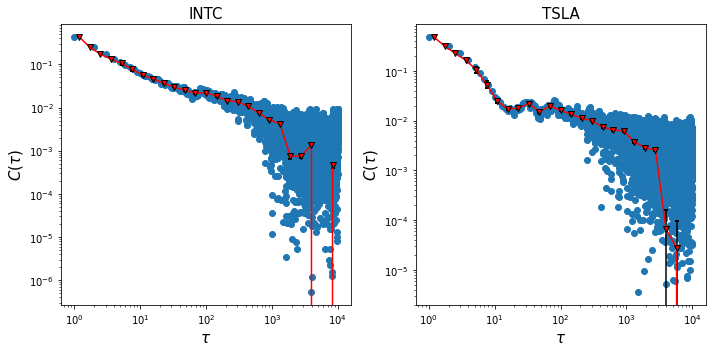

In [37]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5),tight_layout=True)

ax1.scatter(t,INTC_acf,zorder=0)
x,y,yerr = binning(np.log10(t),INTC_acf,25)
ax1.errorbar(10**np.array(x),y,yerr = yerr,color="red",marker="v",mec="black",capthick=2,capsize=2,ecolor="black",zorder=1)

ax2.scatter(t,TSLA_acf,zorder=0)
x,y,yerr = binning(np.log10(t),TSLA_acf,25)
ax2.errorbar(10**np.array(x),y,yerr = yerr,color="red",marker="v",mec="black",capthick=2,capsize=2,ecolor="black",zorder=1)

ax1.set_yscale("log")
ax1.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xscale("log")
ax1.set_title("INTC",fontsize=15)
ax1.set_xlabel(r"$\tau$",fontsize=15)
ax1.set_ylabel(r"$C(\tau)$",fontsize=15)

ax2.set_title("TSLA",fontsize=15)
ax2.set_xlabel(r"$\tau$",fontsize=15)
ax2.set_ylabel(r"$C(\tau)$",fontsize=15)
plt.savefig("LongMemory_MO.png")
plt.savefig("../../../docs/CodeExample/StylizedFacts/LongMemory_MO.png")


/home/yuki/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/yuki/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


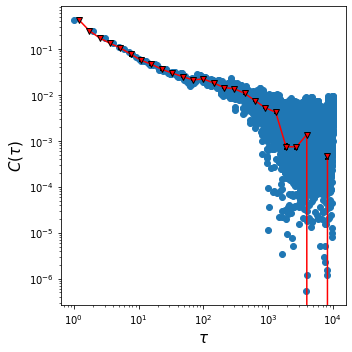

In [38]:
fig,(ax1) = plt.subplots(1,1,figsize=(5,5),tight_layout=True)

ax1.scatter(t,INTC_acf,zorder=0)
x,y,yerr = binning(np.log10(t),INTC_acf,25)
ax1.errorbar(10**np.array(x),y,yerr = yerr,color="red",marker="v",mec="black",capthick=2,capsize=2,ecolor="black",zorder=1)

ax1.set_yscale("log")
ax1.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xscale("log")
#ax1.set_title("INTC",fontsize=15)
ax1.set_xlabel(r"$\tau$",fontsize=15)
ax1.set_ylabel(r"$C(\tau)$",fontsize=15)

plt.savefig("../../../docs/CodeExample/StylizedFacts/LongMemory_MO.png")